# Basic Package Mangement

In [1]:
#install.packages("pacman") # Execute this once.
require(pacman)

Loading required package: pacman
Warning message:
"package 'pacman' was built under R version 3.6.3"

### Clearing and unloading packages

In [30]:
# Run this block, when done coding or before starting coding.
p_unload(all)
detach("package:datasets", unload=TRUE)
rm(list=ls()) # removes all previous stored variables

The following packages have been unloaded:
readxl, magrittr, mosaic, ggridges, mosaicData, ggformula, ggstance, Matrix, lattice, forcats, stringr, dplyr, purrr, readr, tidyr, tibble, ggplot2, tidyverse, pacman



### Loading packages

In [2]:
pacman::p_load(pacman, tidyverse, mosaic, magrittr)

# Initializing the dataframe

In [3]:
library("readxl")
df <- read_excel("data/DeathsDK160321.xlsx")
df

interval,age,infected,tested,female_deaths,male_deaths,tot_deaths,comorbidity,infected_fem,infected_male,tot_male,tot_fem,tot_num
1,0-9,15400,395142,0,1,1,1,7372,8028,313571,297559,611130
2,10-19,34025,605344,0,0,0,0,16626,17399,348964,331889,680853
3,20-29,41545,688922,0,0,0,0,21296,20249,397572,381907,779479
4,30-39,30514,604186,4,2,6,3,15615,14899,352231,341194,693425
5,40-49,32482,646070,3,4,7,5,17345,15137,376117,375174,751291
6,50-59,31843,660087,21,32,53,37,16507,15336,402188,398825,801013
7,60-69,17558,490990,73,122,195,153,8562,8996,327021,338282,666262
8,70-79,10910,370426,229,395,624,516,5378,5532,272021,300894,572915
9,80-89,5760,140654,441,523,964,784,3330,2430,99560,135830,235390
10,90+,1805,28610,325,220,545,433,1277,528,13237,32228,45455


### Plotting and testing

In [4]:
mortality = df %>% 
  filter(age != "Alle") %>% 
  select(age, infected, tested, tot_deaths) %>% 
  mutate(`Mortality given Infected` = tot_deaths/infected) %>% 
  rename(Age = age) %>% 
  select(-tested,-tot_deaths)

In [5]:
mortality

Age,infected,Mortality given Infected
0-9,15400,6.493506e-05
10-19,34025,0.000000e+00
20-29,41545,0.000000e+00
30-39,30514,1.966311e-04
40-49,32482,2.155040e-04
50-59,31843,1.664416e-03
60-69,17558,1.110605e-02
70-79,10910,5.719523e-02
80-89,5760,1.673611e-01
90+,1805,3.019391e-01


In [6]:
Binomial_Bootstrap = function(p,n, B = 10000){
  #Generate new MEAN data
  p_B = rbinom(B,n,p)/n
}

In [7]:
Quantiles_Binomial = mortality %>% 
  mutate(Bootstraps = map2(`Mortality given Infected`, infected, Binomial_Bootstrap, B = 10000)) %>% 
  mutate(Quantiles = map(Bootstraps, quantile, c(0.025,0.975))) %>% 
  mutate(`2.5% quantile` = unlist(map(Quantiles, function(x){x[1]}))) %>% 
  mutate(`97.5% quantile` = unlist(map(Quantiles, function(x){x[2]}))) %>% 
  select(Age, `2.5% quantile`, `97.5% quantile`)

In [8]:
Quantiles_Binomial

Age,2.5% quantile,97.5% quantile
0-9,0.000000e+00,0.0001948052
10-19,0.000000e+00,0.0000000000
20-29,0.000000e+00,0.0000000000
30-39,6.554368e-05,0.0003604903
40-49,6.157256e-05,0.0004002217
50-59,1.224759e-03,0.0021354772
60-69,9.568288e-03,0.0127007632
70-79,5.297892e-02,0.0615032081
80-89,1.578125e-01,0.1769097222
90+,2.803324e-01,0.3229916898


In [9]:
Bernoulli_Bootstrap = function(p,n, B = 10000){
  #Generate new MEAN data
  p_B = replicate(B,mean(rbernoulli(n,p)))
}

In [10]:
Quantiles_Bernoulli = mortality %>% 
  mutate(Bootstraps = map2(`Mortality given Infected`, infected, Bernoulli_Bootstrap, B = 1000)) %>% 
  mutate(Quantiles = map(Bootstraps, quantile, c(0.025,0.975))) %>% 
  mutate(`2.5% quantile` = unlist(map(Quantiles, function(x){x[1]}))) %>% 
  mutate(`97.5% quantile` = unlist(map(Quantiles, function(x){x[2]}))) %>% 
  select(Age, `2.5% quantile`, `97.5% quantile`)

In [11]:
Quantiles_Bernoulli

Age,2.5% quantile,97.5% quantile
0-9,0.000000e+00,0.0001948052
10-19,0.000000e+00,0.0000000000
20-29,0.000000e+00,0.0000000000
30-39,6.554368e-05,0.0003932621
40-49,6.157256e-05,0.0004002217
50-59,1.224759e-03,0.0021040731
60-69,9.566864e-03,0.0125299009
70-79,5.306829e-02,0.0615948671
80-89,1.578082e-01,0.1765625000
90+,2.786704e-01,0.3218836565


In [12]:
Quantiles_Bernoulli %<>% mutate(Bootstrap = "Bernoulli")
Quantiles_Binomial %<>% mutate(Bootstrap = "Binomial")

In [13]:
Quantiles = rbind(Quantiles_Bernoulli,Quantiles_Binomial)

In [14]:
Quantiles

Age,2.5% quantile,97.5% quantile,Bootstrap
0-9,0.000000e+00,0.0001948052,Bernoulli
10-19,0.000000e+00,0.0000000000,Bernoulli
20-29,0.000000e+00,0.0000000000,Bernoulli
30-39,6.554368e-05,0.0003932621,Bernoulli
40-49,6.157256e-05,0.0004002217,Bernoulli
50-59,1.224759e-03,0.0021040731,Bernoulli
60-69,9.566864e-03,0.0125299009,Bernoulli
70-79,5.306829e-02,0.0615948671,Bernoulli
80-89,1.578082e-01,0.1765625000,Bernoulli
90+,2.786704e-01,0.3218836565,Bernoulli


Warning message:
"attributes are not identical across measure variables;
they will be dropped"

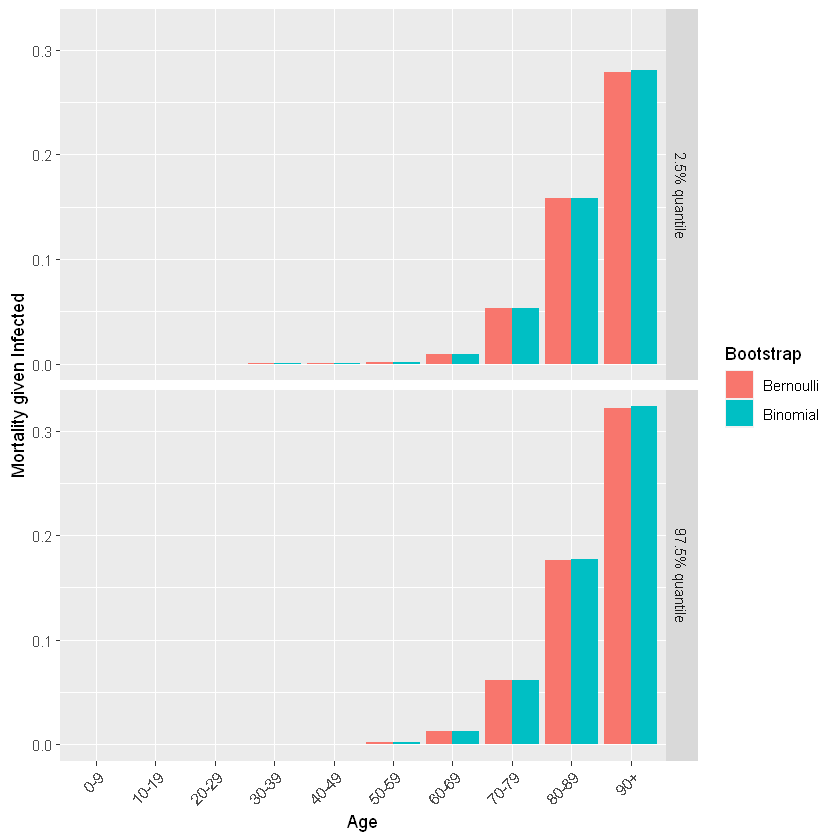

In [15]:
Quantiles %>% gather("Quantile","Value", -Age,-Bootstrap) %>% 
  ggplot(aes(x = Age, y = Value, fill = Bootstrap)) + 
  geom_bar(stat = "identity",position=position_dodge()) + 
  facet_grid(vars(Quantile)) +
  theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
  ylab("Mortality given Infected")

# Logistisk regression på en kategorisk variabel

Vi vil undersøge, hvad sandsynligheden er for at man dør givet en specifik alder.
Dog kan der opstå et problem, da modellen oftest operere på kontinuerete forklarende variable.

Da kan det være nødvendigt at undersøge, hvorvidt det har nogen betydning i vores tilfælde. Vi har nemlig en variabel der originalt er kontinuert - altså variablen alder, men denne variabel er gjort diskret ved at afrunde alderen til kun at indeholde år. Efterfølgende er alderen yderligere opdelt kategorisk, så der er tale om en aldersgruppe.

Har dette nogen signifikant betydning for resultatet?

In [16]:
DKpop <- read_excel("data/folketal.xlsx")

In [17]:
head(DKpop, 10)
tail(DKpop, 10)

age,total,male,female
0,61191,31303,29888
1,61663,31758,29905
2,61967,31909,30058
3,62185,31852,30333
4,62844,32402,30442
5,59740,30627,29113
6,59064,30350,28714
7,58551,29944,28607
8,60898,31371,29527
9,62107,31587,30520


age,total,male,female
116,0,0,0
117,0,0,0
118,0,0,0
119,0,0,0
120,0,0,0
121,0,0,0
122,0,0,0
123,0,0,0
124,0,0,0
125,0,0,0


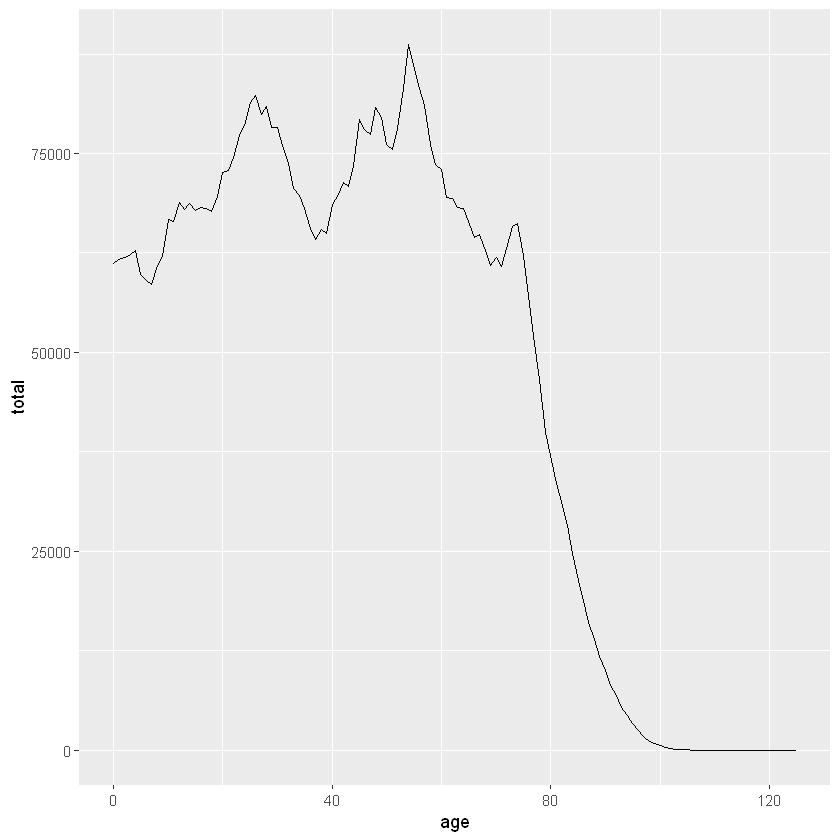

In [18]:
DKpop %>%
  ggplot(aes(x = age, y = total)) +
  geom_line()

In [19]:
DKpop_prob = DKpop %>% 
  mutate(`prob_total` = total/sum(total))

In [20]:
head(DKpop_prob, 20)

age,total,male,female,prob_total
0,61191,31303,29888,0.01047783
1,61663,31758,29905,0.01055865
2,61967,31909,30058,0.01061071
3,62185,31852,30333,0.01064803
4,62844,32402,30442,0.01076088
5,59740,30627,29113,0.01022937
6,59064,30350,28714,0.01011362
7,58551,29944,28607,0.01002578
8,60898,31371,29527,0.01042766
9,62107,31587,30520,0.01063468


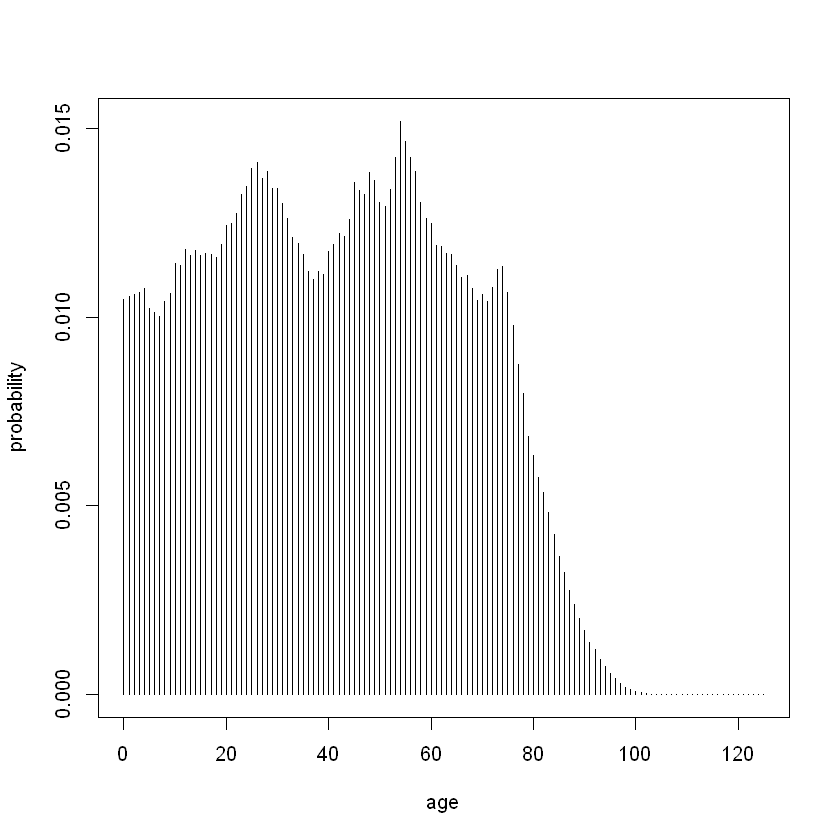

In [21]:
plot(DKpop_prob$age, DKpop_prob$prob_total, xlab = "age", ylab = "probability", type="h")

In [22]:
sample_data <- sample(DKpop_prob$age, 100000, replace = TRUE, prob = DKpop_prob$prob_total)

In [23]:
sample_data[0:10]
for (i in 0:length(sample_data)) {
    sample_data[i] <- sample_data[i] + runif(1, 0, 1)
}
sample_data[0:10]

[1] 67 52 54 49 48 82  9 44 73 81

[1] 67.114331 52.162476 54.221610 49.159483 48.599047 82.966624  9.466153
 [8] 44.804903 73.377013 81.213700

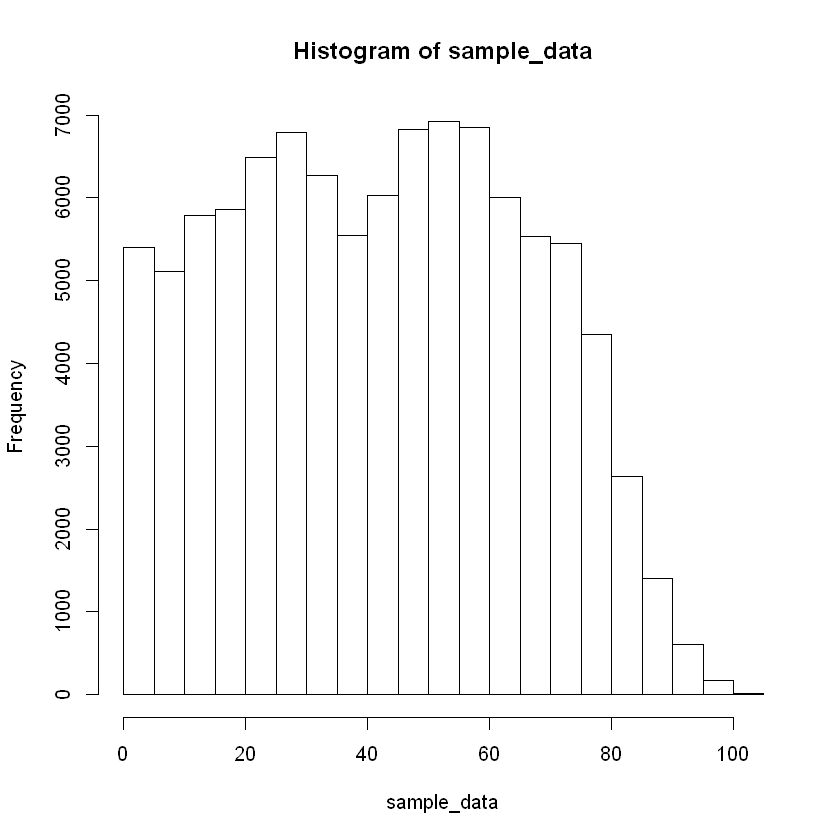

In [29]:
hist(sample_data)

[1] 60 50 50 40 40 80  0 40 70 80

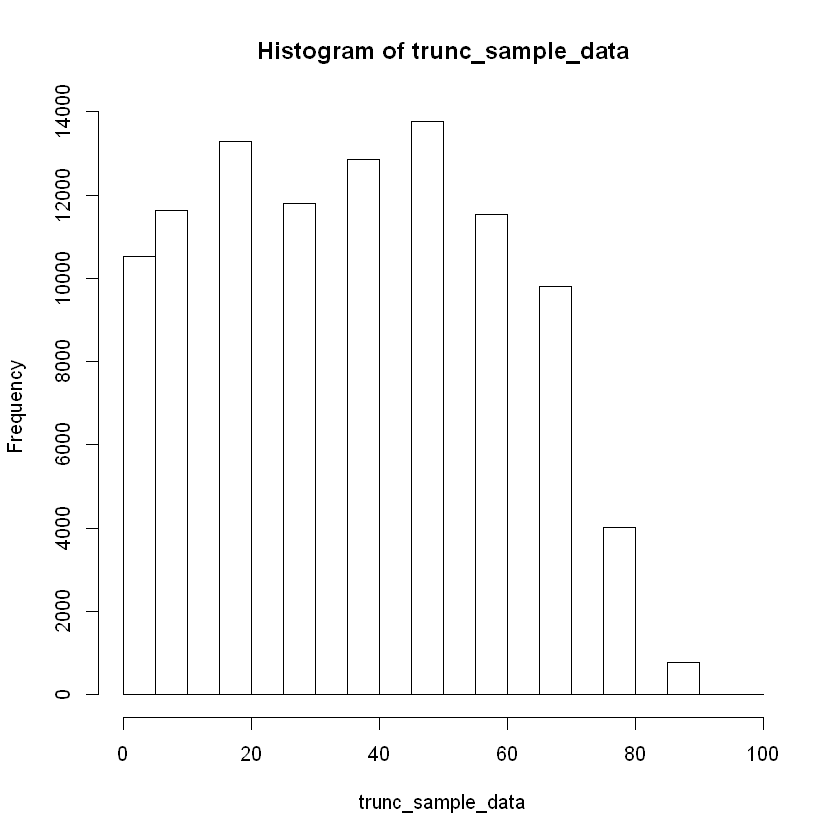

In [28]:
trunc_sample_data <- floor(sample_data/10)*10
hist(trunc_sample_data)

In [26]:
#modelFit <- glm(~1, data = trunc_sample_data, family = binomial)
#summary(modelFit)